In [25]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_selection import f_classif,SelectKBest,chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.decomposition import PCA
import tensorflow as tf
from sklearn.cluster import DBSCAN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
firewall = pd.read_csv("C:/Users/dharu/OneDrive/Desktop/ISROSpaceHackathon/firewall.csv")

C:\Users\dharu\AppData\Local\Temp\ipykernel_19628\771902853.py:1: DtypeWarning: Columns (49,58,59,60,62,63,64,65,66,67,69,70,72) have mixed types. Specify dtype option on import or set low_memory=False.
  firewall = pd.read_csv("C:/Users/dharu/OneDrive/Desktop/ISROSpaceHackathon/firewall.csv")


In [3]:
firewall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380837 entries, 0 to 380836
Data columns (total 74 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   logver            380837 non-null  int64  
 1   timestamp         380837 non-null  int64  
 2   tz                380837 non-null  object 
 3   devname           380837 non-null  object 
 4   devid             380837 non-null  object 
 5   vd                380837 non-null  object 
 6   date              380837 non-null  object 
 7   time              380837 non-null  object 
 8   logid             380837 non-null  object 
 9   type              380837 non-null  object 
 10  subtype           380837 non-null  object 
 11  level             380837 non-null  object 
 12  eventtime         380837 non-null  int64  
 13  srcip             378837 non-null  object 
 14  srcport           284987 non-null  float64
 15  srcintf           378837 non-null  object 
 16  srcintfrole       37

In [4]:
threshold = 0.9  # Choose an appropriate threshold
df_cleaned = firewall.dropna(thresh=threshold*len(firewall), axis=1)

In [6]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380837 entries, 0 to 380836
Data columns (total 34 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   logver       380837 non-null  int64  
 1   timestamp    380837 non-null  int64  
 2   tz           380837 non-null  object 
 3   devname      380837 non-null  object 
 4   devid        380837 non-null  object 
 5   vd           380837 non-null  object 
 6   date         380837 non-null  object 
 7   time         380837 non-null  object 
 8   logid        380837 non-null  object 
 9   type         380837 non-null  object 
 10  subtype      380837 non-null  object 
 11  level        380837 non-null  object 
 12  eventtime    380837 non-null  int64  
 13  srcip        378837 non-null  object 
 14  srcintf      378837 non-null  object 
 15  srcintfrole  378837 non-null  object 
 16  dstip        378837 non-null  object 
 17  dstintf      378837 non-null  object 
 18  dstintfrole  378837 non-

In [16]:
fl = [i for i in df_cleaned.columns if df_cleaned[i].dtype == "float64"]
it = [i for i in df_cleaned.columns if df_cleaned[i].dtype == "int64"]
ob = [i for i in df_cleaned.columns if df_cleaned[i].dtype == "object"]

In [17]:
df_cleaned[fl] = df_cleaned[fl].fillna(0)
df_cleaned[it] = df_cleaned[it].fillna(0)
df_cleaned[ob] = df_cleaned[ob].fillna("NA")

C:\Users\dharu\AppData\Local\Temp\ipykernel_19628\1744801047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[fl] = df_cleaned[fl].fillna(0)
C:\Users\dharu\AppData\Local\Temp\ipykernel_19628\1744801047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[it] = df_cleaned[it].fillna(0)
C:\Users\dharu\AppData\Local\Temp\ipykernel_19628\1744801047.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [18]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380837 entries, 0 to 380836
Data columns (total 34 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   logver       380837 non-null  int64  
 1   timestamp    380837 non-null  int64  
 2   tz           380837 non-null  object 
 3   devname      380837 non-null  object 
 4   devid        380837 non-null  object 
 5   vd           380837 non-null  object 
 6   date         380837 non-null  object 
 7   time         380837 non-null  object 
 8   logid        380837 non-null  object 
 9   type         380837 non-null  object 
 10  subtype      380837 non-null  object 
 11  level        380837 non-null  object 
 12  eventtime    380837 non-null  int64  
 13  srcip        380837 non-null  object 
 14  srcintf      380837 non-null  object 
 15  srcintfrole  380837 non-null  object 
 16  dstip        380837 non-null  object 
 17  dstintf      380837 non-null  object 
 18  dstintfrole  380837 non-

In [20]:
selected_features = [
    'eventtime', 'sessionid', 'proto', 'policyid', 'duration', 'sentbyte', 'rcvdbyte', 'sentpkt',
    'devname', 'type', 'subtype', 'level', 'srcintf', 'dstintf', 'action', 'policytype', 
    'service', 'dstcountry', 'srccountry', 'trandisp', 'appcat', 'timestamp'
]

df_selected = df_cleaned[selected_features]

In [24]:
lab = LabelEncoder()
for i in selected_features:
    df_selected[i] = lab.fit_transform(df_selected[i])

C:\Users\dharu\AppData\Local\Temp\ipykernel_19628\4024071963.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[i] = lab.fit_transform(df_selected[i])


In [32]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
clusters = dbscan.fit_predict(df_selected)

In [33]:
cl = []
for i in clusters:
    if i not in cl:
        cl.append(i)
cl

[-1, 0]

In [37]:
df_selected.columns

Index(['eventtime', 'sessionid', 'proto', 'policyid', 'duration', 'sentbyte',
       'rcvdbyte', 'sentpkt', 'devname', 'type', 'subtype', 'level', 'srcintf',
       'dstintf', 'action', 'policytype', 'service', 'dstcountry',
       'srccountry', 'trandisp', 'appcat', 'timestamp'],
      dtype='object')

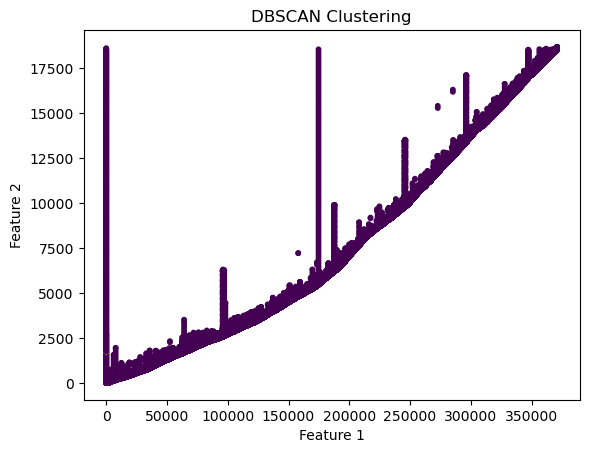

In [39]:
plt.scatter(df_selected['sessionid'], df_selected['eventtime'], c=clusters, s=10)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()